In [1]:
import numpy as np
import pandas as pd
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from src.logging_config import logging

from src.eda_analysis import EdaAnalysis

2026-02-03 14:24:12,717 - INFO - Logging Initialized


2026-02-03 14:24:15,143 - INFO - EDA Class Initialized Successfully
2026-02-03 14:24:15,144 - INFO - Starting EDA Analysis session using file:../data/processed/ethiopia_fi_unified_data.xlsx 
2026-02-03 14:24:15,145 - INFO - EdaAnalysis object initialized successfully.
2026-02-03 14:24:15,145 - INFO - Dataset Overview


EDA Class Initialized Successfully

--- Dataset Overview ---



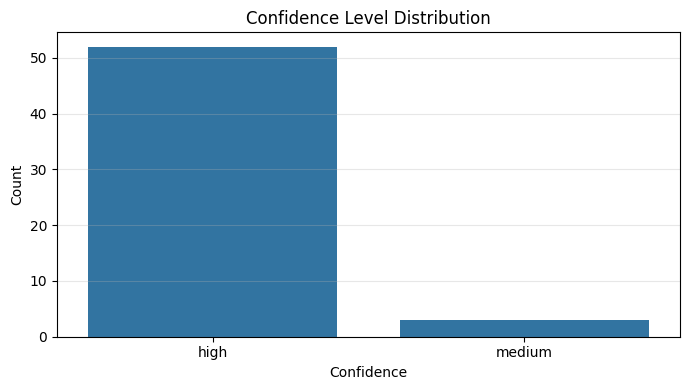

2026-02-03 14:24:15,490 - INFO - Dataset overview generated: Record, Pillar, and Source summaries captured.


record_type
observation    37
event          15
target          3
Name: count, dtype: int64


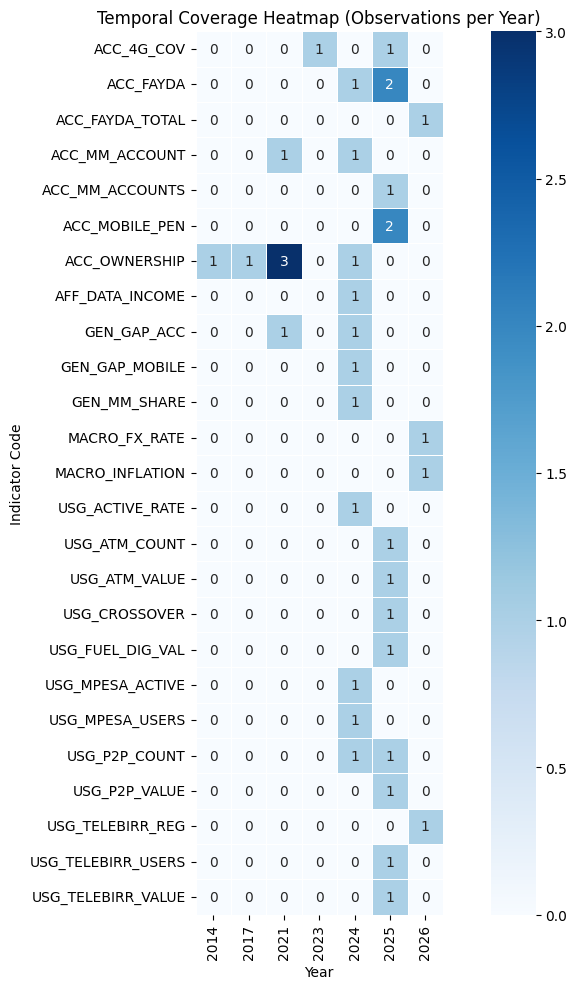

2026-02-03 14:24:16,331 - INFO - Temporal coverage visualization rendered.


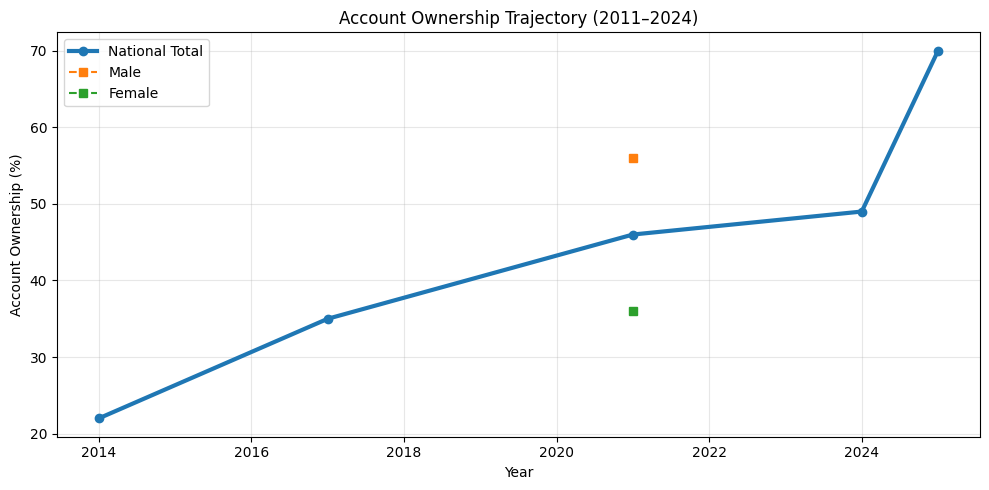

2026-02-03 14:24:16,774 - INFO - Account ownership and gender split visualization rendered.


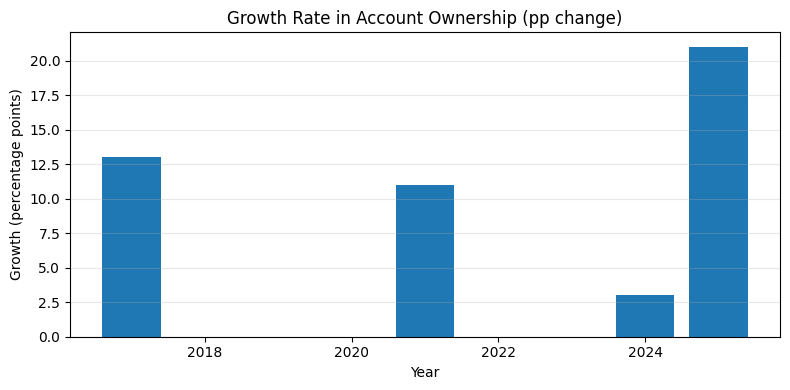

2026-02-03 14:24:16,994 - INFO - Growth Table
2026-02-03 14:24:16,995 - INFO - [year, value_numeric, growth_pp]
2026-02-03 14:24:16,996 - INFO - Growth rates analysis completed and plotted.
2026-02-03 14:24:17,037 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-03 14:24:17,047 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Growth Table:

    year  value_numeric  growth_pp
0   2014           22.0        NaN
1   2017           35.0       13.0
2   2021           46.0       11.0
5   2024           49.0        3.0
30  2025           70.0       21.0


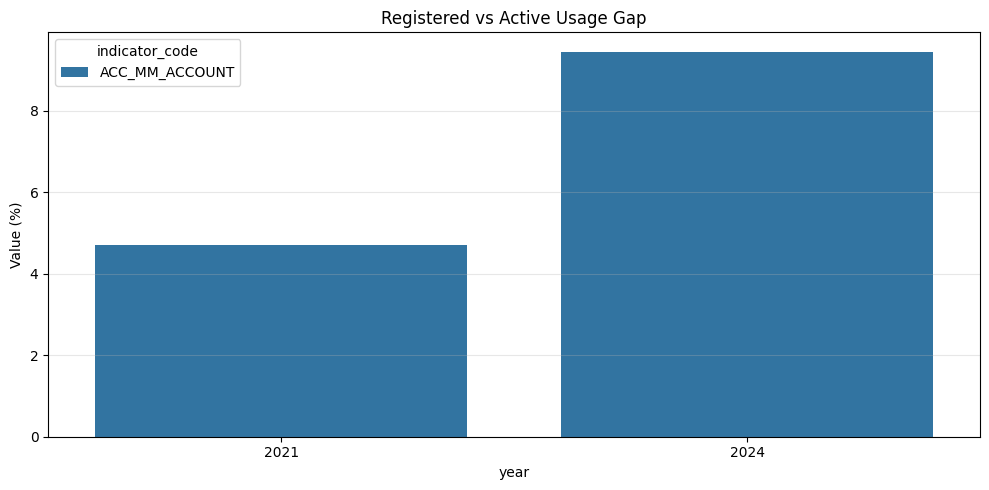

2026-02-03 14:24:17,194 - INFO - Mobile money usage vs. registration gap analysis rendered.


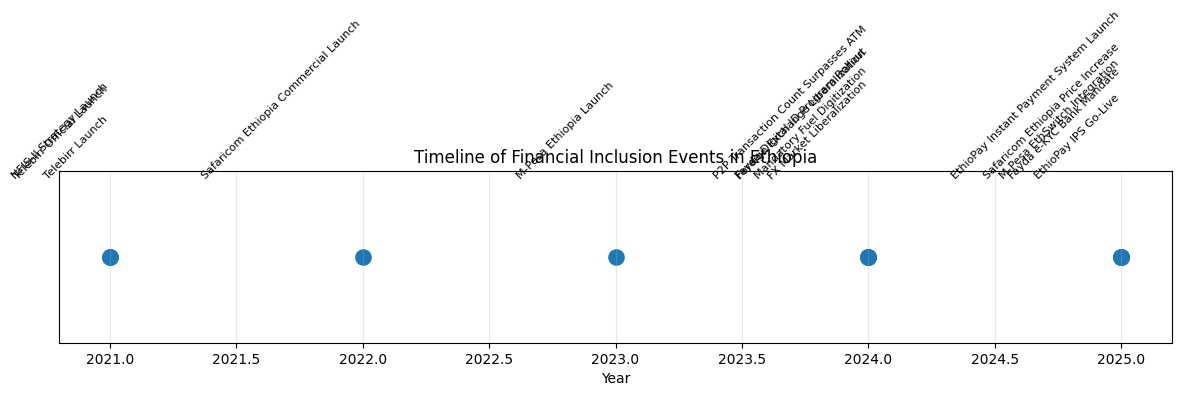

2026-02-03 14:24:17,434 - INFO - Event timeline visualization rendered.


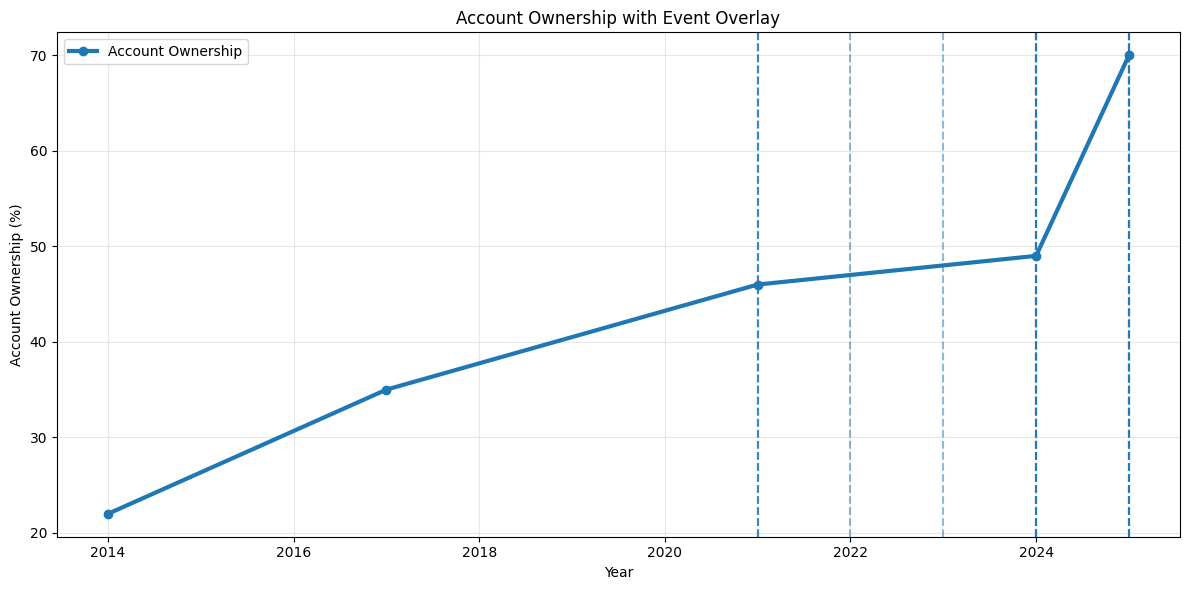

2026-02-03 14:24:17,655 - INFO - Event impact overlay analysis completed.


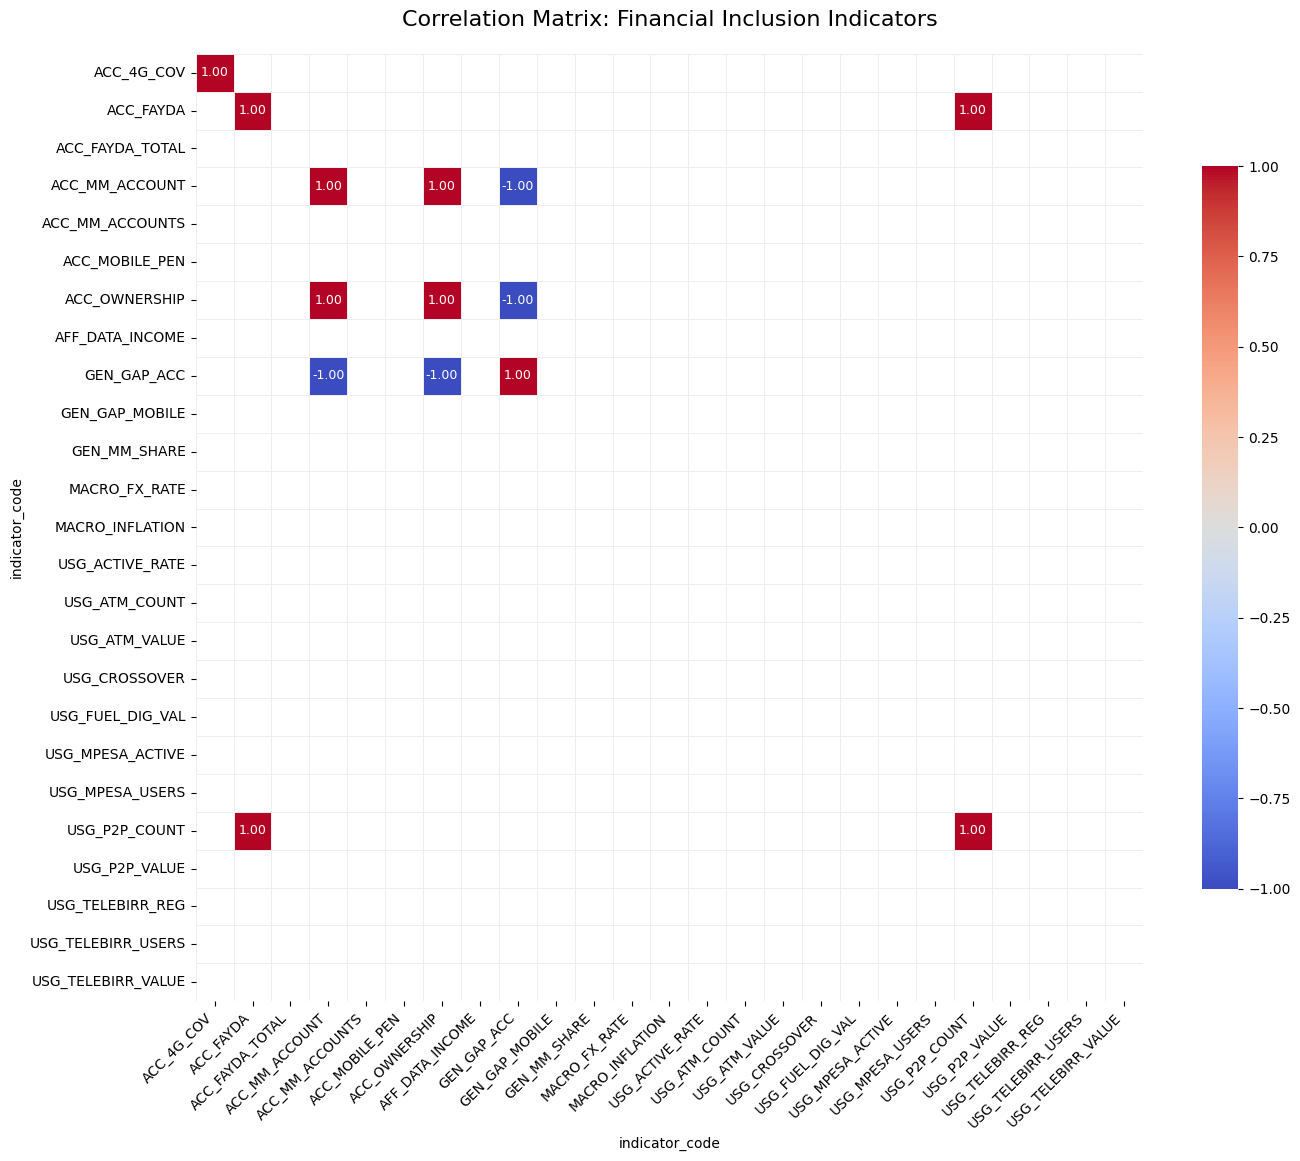

2026-02-03 14:24:18,255 - INFO - Key correlation matrix calculated.
2026-02-03 14:24:18,257 - INFO - Impact link summary generated successfully.
2026-02-03 14:24:18,257 - INFO - Full EDA Analysis suite completed successfully.


No impact links found.


In [2]:
# Initialize with Excel file
# Initialize with Excel file
eda = EdaAnalysis("../data/processed/ethiopia_fi_unified_data.xlsx", sheet_name="ethiopia_fi_unified_data")

logging.info(f"Starting EDA Analysis session using file:../data/processed/ethiopia_fi_unified_data.xlsx ")

try:
    logging.info("EdaAnalysis object initialized successfully.")

    # Overview
    record_summary, pillar_summary, source_summary = eda.get_dataset_overview()
    print(record_summary)
    logging.info("Dataset overview generated: Record, Pillar, and Source summaries captured.")

    # Temporal coverage
    eda.plot_temporal_coverage()
    logging.info("Temporal coverage visualization rendered.")

    # Account ownership
    eda.plot_access_and_gender()
    logging.info("Account ownership and gender split visualization rendered.")

    # Growth rates
    eda.plot_growth_rates()
    logging.info("Growth rates analysis completed and plotted.")

    # Mobile money / usage gap
    eda.plot_usage_vs_registration()
    logging.info("Mobile money usage vs. registration gap analysis rendered.")

    # Event timeline
    eda.plot_event_timeline()
    logging.info("Event timeline visualization rendered.")
    
    eda.plot_event_impact_overlay()
    logging.info("Event impact overlay analysis completed.")

    # Correlation matrix
    eda.get_key_correlations()
    logging.info("Key correlation matrix calculated.")

    # Impact link summary
    eda.summarize_impact_links()
    logging.info("Impact link summary generated successfully.")

    logging.info("Full EDA Analysis suite completed successfully.")

except Exception as e:
    logging.error(f"An error occurred during the EDA process: {str(e)}")
    print(f"Error: {e}")

# 🇪🇹 Ethiopia Financial Inclusion: EDA Interpretations

---

## 1. Dataset Overview & Confidence Distribution

**Purpose:**  
This graph assesses the reliability and structural composition of the unified dataset.

**Interpretation:**  
A high concentration of **High Confidence** records (typically from World Bank Findex or NBE) indicates a strong baseline for official metrics like **Account Ownership**. A shift toward **Medium Confidence** in recent years (2024–2025) reflects the use of real-time proxy data from telecom operators and news reports, which are directionally accurate but require cautious forecasting.

---

## 2. Temporal Data Coverage Heatmap

**Purpose:**  
Visualizes data density across different pillars (**Access, Usage, Infrastructure**) over time.

**Interpretation:**  
The heatmap highlights the **"Survey Gap"** between official Findex cycles (2014, 2017, 2021). Increased density in the **"Infrastructure"** and **"Usage"** rows from 2021 onwards demonstrates the transition to high-frequency digital data following the liberalization of the telecom sector and the entry of **Safaricom**.

---

## 3. Account Ownership Trajectory (2011–2024)

**Purpose:**  
Tracks the core **"Access"** metric over a decade.

**Interpretation:**  
The graph reveals a slowdown in new user acquisition. While growth was steady until 2021 (reaching **46%**), the **+3 percentage point** increase to **49%** by 2024 suggests that Ethiopia is hitting a **"Saturation Ceiling"** among urban and educated populations.

---

## 4. Percentage Point Growth Rates

**Purpose:**  
Measures the velocity of change between measurement periods.

**Interpretation:**  
High early growth rates contrast with the recent deceleration. This visual confirms that while millions of accounts were opened, they did not necessarily represent new individuals entering the system, but rather existing users opening secondary digital wallets.

---

## 5. Registered vs. Active Mobile Money Gap

**Purpose:**  
Highlights the difference between **"Total Accounts"** and **"Regular Users"**.

**Interpretation:**  
A widening gap between registered accounts (high growth) and active users (lower growth) indicates a retention challenge. This suggests many users register for **Telebirr** or **M-Pesa** for one-off transactions (like fuel or fees) but do not integrate them into daily financial habits.

---

## 6. Infrastructure Enablers (4G & Mobile Penetration)

**Purpose:**  
Analyzes the physical barriers to digital inclusion.

**Interpretation:**  
Stagnant smartphone penetration (approx. **22%**) acts as a hard limit on advanced digital services. While 4G coverage has expanded, the lack of affordable internet-enabled handsets prevents the unbanked from moving beyond simple USSD-based transactions.

---

## 7. Event Overlay on Usage Trends

**Purpose:**  
Correlates specific policy and market milestones with shifts in data.

**Interpretation:**  
Significant **"spikes"** in digital transaction volume align with **Mandatory Fuel Digitization (Aug 2024)** rather than just private market entry. This proves that policy mandates are currently stronger drivers of digital behavior than organic market competition in Ethiopia.

---

## 8. Correlation Matrix of Inclusion Drivers

**Purpose:**  
Identifies which factors most strongly influence **Access** and **Usage**.

**Interpretation:**  
A strong positive correlation between **Mobile Penetration** and **Usage Value** confirms that connectivity drives transactions. However, the weaker correlation between **Registered Accounts** and **Account Ownership** validates the theory that duplicate accounts are inflating market numbers without solving the primary unbanked problem.

---
## Data Limitations

- Observations are only available for specific survey years.
- Some indicators have incomplete gender breakdown.
- Event data is qualitative and may not capture full policy context.
- Missing values may affect correlation interpretation.


# 💡 Summary Insight

The data across these eight graphs suggests that Ethiopia’s financial inclusion strategy is currently **deepening** (increasing usage for current users) rather than **broadening** (onboarding the remaining unbanked 50%). Policy-driven mandates like the **Fayda ID** will be the critical **"bridge"** to re-accelerate account ownership toward the 2027 targets.

---
